In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib
import os
import random

====================================================================================================

**Goal : gather similar companies according to their features and number of trading days**

**Use : provide coherent and meaningful data to model**


**(_Ideal_ : develop tailored model to each type of groups)**



**_See Notebook `Table of content` for good understanding about what this notebook is doing when ran_**

====================================================================================================

# Anaysis of Companies Age from `nasdaq_us_stats.xls`

In [2]:
#!!!Path might not be the same!!!

meta_df = pd.read_csv('../../../raw_data/metadata/nasdaq_us_stats.xls')

In [3]:
meta_df.head()

,Unnamed: 0,stock,days,min_close,max_close,start_date,end_date
0,0,AACG.US,3165,0.21703,3.850,2008-01-28,2021-01-25
1,1,AACQ.US,96,9.62000,11.070,2020-09-08,2021-01-25
2,2,AACQU.US,134,10.00000,11.900,2020-07-15,2021-01-25
3,3,AACQW.US,95,1.07500,2.580,2020-09-09,2021-01-25
4,4,AAL.US,1793,9.04000,56.989,2013-12-10,2021-01-25


In [4]:
meta_df.describe()

,Unnamed: 0,days,min_close,max_close
count,3921.000000,3921.000000,3921.000000,3.921000e+03
mean,1960.000000,1876.186942,8.257047,6.181576e+06
std,1132.039531,1795.084440,16.268917,3.863434e+08
min,0.000000,1.000000,0.001000,2.400000e-01
25%,980.000000,312.000000,1.490000,1.438700e+01
50%,1960.000000,1286.000000,5.010000,2.880000e+01
75%,2940.000000,3775.000000,10.384000,6.533000e+01
max,3920.000000,12879.000000,647.290000,2.419200e+10


In [5]:
meta_df = meta_df[['stock', 'days', 'min_close', 'max_close']]

## Company age classification

In [6]:
meta_df['range_price'] = meta_df['max_close'] - meta_df['min_close']
meta_df['years'] = meta_df['days']/365

In [7]:
clean_meta_df = meta_df[['stock', 'years', 'range_price']]

<AxesSubplot:xlabel='years', ylabel='Count'>

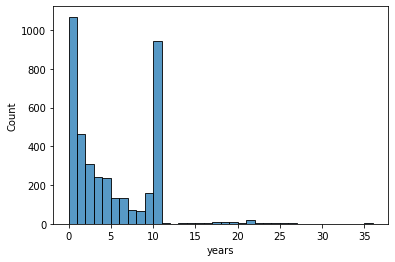

In [8]:
sns.histplot(clean_meta_df['years'], binwidth=1)

👆👆**Anomaly at less than 1 year and 10 year old companies**👆👆

In [9]:
bins = [0, 1, 5, 10, 15, 20, 25, 30, 40]

clean_meta_df['company_vintage'] = pd.cut(meta_df['years'].copy(), 
                                          bins)                            # A company aged of 1Y and one day is
                                          #labels=['(0, 1]','(1, 5]',       # part of the '(1, 5]' class
                                          #        '(5, 10]', '(10, 15]',
                                          #        '(15, 20]', '(20, 25]',
                                          #        '(25, 30]', '(30, 40]'])
print(clean_meta_df['company_vintage'])

0        (5, 10]
1         (0, 1]
2         (0, 1]
3         (0, 1]
4         (1, 5]
5        (5, 10]
6        (5, 10]
7       (10, 15]
8       (25, 30]
9       (10, 15]
10      (10, 15]
11      (10, 15]
12        (0, 1]
13        (0, 1]
14        (1, 5]
15      (10, 15]
16      (10, 15]
17        (0, 1]
18        (0, 1]
19        (1, 5]
20       (5, 10]
21        (0, 1]
22        (0, 1]
23        (0, 1]
24      (10, 15]
25        (0, 1]
26        (0, 1]
27        (0, 1]
28        (1, 5]
29        (0, 1]
          ...   
3891     (5, 10]
3892     (5, 10]
3893      (0, 1]
3894      (0, 1]
3895      (0, 1]
3896      (0, 1]
3897      (0, 1]
3898      (1, 5]
3899    (20, 25]
3900      (1, 5]
3901      (0, 1]
3902      (0, 1]
3903      (0, 1]
3904    (10, 15]
3905    (10, 15]
3906      (1, 5]
3907      (1, 5]
3908      (1, 5]
3909     (5, 10]
3910      (0, 1]
3911      (0, 1]
3912      (0, 1]
3913      (0, 1]
3914      (1, 5]
3915      (1, 5]
3916    (10, 15]
3917     (5, 10]
3918      (1, 

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
clean_meta_df['company_vintage'].apply(str)
print(clean_meta_df.info())
clean_meta_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 4 columns):
stock              3921 non-null object
years              3921 non-null float64
range_price        3921 non-null float64
company_vintage    3921 non-null category
dtypes: category(1), float64(2), object(1)
memory usage: 95.9+ KB
None


,stock,years,range_price,company_vintage
0,AACG.US,8.671233,3.63297,"(5, 10]"
1,AACQ.US,0.263014,1.45000,"(0, 1]"
2,AACQU.US,0.367123,1.90000,"(0, 1]"
3,AACQW.US,0.260274,1.50500,"(0, 1]"
4,AAL.US,4.912329,47.94900,"(1, 5]"


## Classification Results

<AxesSubplot:xlabel='years', ylabel='Count'>

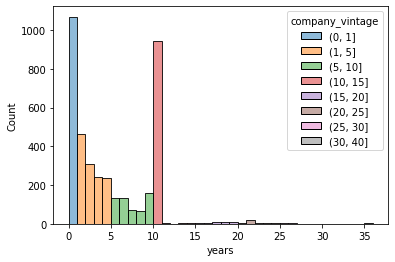

In [11]:
sns.histplot(data=clean_meta_df, x='years', binwidth=1, hue='company_vintage')
#plt.savefig('companies_age_classification.pdf', dpi=1200)

In [12]:
clean_meta_df.groupby('company_vintage')['stock'].count()

company_vintage
(0, 1]      1069
(1, 5]      1252
(5, 10]      564
(10, 15]     950
(15, 20]      32
(20, 25]      37
(25, 30]      13
(30, 40]       4
Name: stock, dtype: int64

### Saving List of Companies Name via `joblib`

In [13]:
stocks_bin_1 = []
stocks_bin_2 = []
stocks_bin_3 = []
stocks_bin_4 = []
stocks_bin_5 = []
stocks_bin_6 = []
stocks_bin_7 = []
stocks_bin_8 = []

for idx, row in clean_meta_df.iterrows():
    x = row['years']                                            # <=> ['days']/365
    st = row['stock'].replace('.US', '')
    
    #print(idx, x, row['stock'])
    if x <= 1 : stocks_bin_1.append(st)
    elif x > 1 and x <= 5: stocks_bin_2.append(st)
    elif x > 5 and x <= 10: stocks_bin_3.append(st)
    elif x > 10 and x <= 15: stocks_bin_4.append(st)        
    elif x > 15 and x <= 20: stocks_bin_5.append(st)        
    elif x > 20 and x <= 25: stocks_bin_6.append(st)        
    elif x > 25 and x <= 30: stocks_bin_7.append(st)        
    elif x > 30: stocks_bin_8.append(st)
    
print(f"Number of companies with less than a year of history: {len(stocks_bin_1)}")
print(f"Number of companies with between a year and 5 years of history: {len(stocks_bin_2)}")    
print(f"Number of companies with between 5 years and 10 years of history: {len(stocks_bin_3)}")
print(f"Number of companies with between 10 years and 15 years of history: {len(stocks_bin_4)}")
print(f"Number of companies with between 15 years and 20 years of history: {len(stocks_bin_5)}")
print(f"Number of companies with between 20 years and 25 years of history: {len(stocks_bin_6)}")
print(f"Number of companies with between 25 years and 30 years of history: {len(stocks_bin_7)}")
print(f"Number of companies with more than 30 years of history: {len(stocks_bin_8)}")

stock_bins = [stocks_bin_1, stocks_bin_2, stocks_bin_3,
              stocks_bin_4, stocks_bin_5, stocks_bin_6,
              stocks_bin_7, stocks_bin_8]

Number of companies with less than a year of history: 1069
Number of companies with between a year and 5 years of history: 1252
Number of companies with between 5 years and 10 years of history: 564
Number of companies with between 10 years and 15 years of history: 950
Number of companies with between 15 years and 20 years of history: 32
Number of companies with between 20 years and 25 years of history: 37
Number of companies with between 25 years and 30 years of history: 13
Number of companies with more than 30 years of history: 4


In [14]:
stock_bins

[['AACQ',
  'AACQU',
  'AACQW',
  'ABCL',
  'ABCM',
  'ABNB',
  'ABST',
  'ACAC',
  'ACACU',
  'ACACW',
  'ACAM',
  'ACAMU',
  'ACAMW',
  'ACCD',
  'ACEV',
  'ACEVU',
  'ACEVW',
  'ACKIU',
  'ACTC',
  'ACTCU',
  'ACTCW',
  'ADERU',
  'ADILW',
  'ADOC',
  'ADOCR',
  'ADOCU',
  'ADOCW',
  'ADTX',
  'ADV',
  'ADVWW',
  'ADXN',
  'AEACU',
  'AEPPZ',
  'AFBI',
  'AFIB',
  'AFINO',
  'AFRM',
  'AGBA',
  'AGBAR',
  'AGBAU',
  'AGBAW',
  'AGC',
  'AGCUU',
  'AGCWW',
  'AGNCO',
  'AGNCP',
  'AHAC',
  'AHACU',
  'AHACW',
  'AIH',
  'AIRTP',
  'AIRTW',
  'AKICU',
  'AKU',
  'AKUS',
  'ALAC',
  'ALACR',
  'ALACU',
  'ALGM',
  'ALGS',
  'ALRS',
  'ALTUU',
  'ALVR',
  'ALXO',
  'AMCIU',
  'AMCIW',
  'AMHC',
  'AMHCU',
  'AMHCW',
  'AMST',
  'AMTI',
  'AMYT',
  'ANDA',
  'ANDAR',
  'ANDAU',
  'ANDAW',
  'ANNX',
  'ANPC',
  'AOUT',
  'API',
  'APRE',
  'APXT',
  'APXTU',
  'APXTW',
  'ARBG',
  'ARBGU',
  'ARBGW',
  'ARKO',
  'ARKOW',
  'ARQT',
  'ARRY',
  'ARTLW',
  'ARYA',
  'ASLE',
  'ASLEW',
  'ASO

❗❗❗**You should check the path you want to save the `stock_bins` list**❗❗❗

(The `metadata` directory is where I saved the `nasdaq_us_stats.xls` csv file of Ian)

In [15]:
joblib.dump(stock_bins, '../../../raw_data/metadata/tickers_per_history_lenght__list')

['../../../raw_data/metadata/tickers_per_history_lenght__list']

In [16]:
stocks_tickers = joblib.load('../../../raw_data/metadata/tickers_per_history_lenght__list')
stocks_tickers

[['AACQ',
  'AACQU',
  'AACQW',
  'ABCL',
  'ABCM',
  'ABNB',
  'ABST',
  'ACAC',
  'ACACU',
  'ACACW',
  'ACAM',
  'ACAMU',
  'ACAMW',
  'ACCD',
  'ACEV',
  'ACEVU',
  'ACEVW',
  'ACKIU',
  'ACTC',
  'ACTCU',
  'ACTCW',
  'ADERU',
  'ADILW',
  'ADOC',
  'ADOCR',
  'ADOCU',
  'ADOCW',
  'ADTX',
  'ADV',
  'ADVWW',
  'ADXN',
  'AEACU',
  'AEPPZ',
  'AFBI',
  'AFIB',
  'AFINO',
  'AFRM',
  'AGBA',
  'AGBAR',
  'AGBAU',
  'AGBAW',
  'AGC',
  'AGCUU',
  'AGCWW',
  'AGNCO',
  'AGNCP',
  'AHAC',
  'AHACU',
  'AHACW',
  'AIH',
  'AIRTP',
  'AIRTW',
  'AKICU',
  'AKU',
  'AKUS',
  'ALAC',
  'ALACR',
  'ALACU',
  'ALGM',
  'ALGS',
  'ALRS',
  'ALTUU',
  'ALVR',
  'ALXO',
  'AMCIU',
  'AMCIW',
  'AMHC',
  'AMHCU',
  'AMHCW',
  'AMST',
  'AMTI',
  'AMYT',
  'ANDA',
  'ANDAR',
  'ANDAU',
  'ANDAW',
  'ANNX',
  'ANPC',
  'AOUT',
  'API',
  'APRE',
  'APXT',
  'APXTU',
  'APXTW',
  'ARBG',
  'ARBGU',
  'ARBGW',
  'ARKO',
  'ARKOW',
  'ARQT',
  'ARRY',
  'ARTLW',
  'ARYA',
  'ASLE',
  'ASLEW',
  'ASO

# Modeling Companies per Vintage - (10, 15]

## Functions definitions & Imports

### `precise_stocks_selector_local()`

In [17]:
from termcolor import colored

def precise_stocks_selector_local(tickers_list=[], path_files='../../../raw_data/processed/',
                                  random_sample=False, num_samp = 2, verbose=1):
    """
    Returns a concatened DataFrame of the stocks data which tickers' list were passed
    
    If random_sample = True, return a DataFrame with random sample of stocks from the tickers' list passed
    
    Example:
    INPUT: ['AEP', 'GT', 'INTC', 'PEP']
    OUTPUT: df.tickers.unique() ==> ['GT', 'INTC']
   
    """
    
    if verbose == 2:
        print(colored(tickers_list, 'yellow'))
        
    t = []
    for ticker in tickers_list:
        ticker = f"{ticker}.csv".lower()
        t.append(ticker)
    tickers_list = t
    
    if verbose == 2:
        print(colored(tickers_list, 'yellow'))
        print()
        print()
    
    if verbose >= 1:
        print(colored(f"****** Starting browsing the '{path_files}' directory ******", 'magenta'))
        
    filenames = []
    missing_stock_csv = []

    
    if random_sample:
        for file in os.listdir(path_files):
            if file.endswith('.csv'):
                if file in tickers_list:
                    filenames.append(file)
        
        for ticker in tickers_list:
            #print(ticker)
            #print(missing_stock_csv)
            if ticker not in filenames:
                missing_stock_csv.append(ticker)
                print(colored(f"{ticker} missing", 'red'))
            else:
                pass
        
        #print(missing_stock_csv)
        
        for missed in missing_stock_csv:
            if missed not in tickers_list:
                missing_stock_csv.remove(missed)
        #print(missing_stock_csv)
        
        if len(filenames) < num_samp:
            print(colored('\nSample size bigger that nuber of companies available\n','red'))
        else:
            sample = random.sample(filenames, num_samp)
            
        if verbose >= 1:
            print(colored("\n   *** Complete sampling ***", 'green'))
            
        if verbose == 2:
            print(colored(f"\nfilenames lenght: {len(filenames)}", "yellow"))
        
        if verbose >= 1:
            print(colored(f"\n\n****** Starting stocks DataFrame creation the sample ******", 'magenta'))
        
        dfs = []

        for ticker in sample:
            ticker_df = pd.read_csv('../../../raw_data/processed/'+ticker)
            dfs.append(ticker_df)
            if verbose == 2:
                print(colored(f"{ticker} DataFrame created", 'yellow'))
        
        if verbose >= 1:
            print(colored(f"\n\n****** Starting concatenating the sample ******", 'magenta'))
            
            
    else: 
        for file in os.listdir(path_files):
            if (file.endswith('.csv')):
                filenames.append(file)
                #print(f"{file}")
        
        if verbose >= 1:
            print(colored("\n   *** Complete file selection ***", 'green'))
        
        dfs = []
        
        if verbose == 2:
            print(colored(f"\nfilenames lenght: {len(filenames)}", "yellow"))
        
        if verbose >= 1:
            print(colored(f"****** Starting stocks DataFrame creation the sample ******", 'magenta'))
      
        for ticker in tickers_list:
            if ticker in filenames:
                #print(f"{ticker}")
                ticker_df = pd.read_csv('../../../raw_data/processed/'+ticker)
                dfs.append(ticker_df)
                if verbose == 2:
                    print(colored(f"{ticker} DataFrame created", 'yellow'))
            else:
                missing_stock_csv.append(ticker)
                print(colored(f"\n{ticker} missing", 'red'))
        
        if verbose >= 1:
            print(colored(f"\n\n****** Starting concatenating the sample ******", 'magenta'))
    
    
    if len(missing_stock_csv) !=0:
        
        print(colored("""\n\n##### Problematic Issue: following stocks not in local database! #####""", "red"))
        print(colored(f"Number of missed stocks: {len(missing_stock_csv)}", "red"))
        print(colored(f"""\n{missing_stock_csv}""", "red"))
    
    return pd.concat(dfs)

### Preprocessing Functions

In [18]:
from sklearn.preprocessing import StandardScaler

def std_scaler(train_set, test_set=0, fit=True, transform=True):
    """
    Scale the data with SKlearn StandardScaler
    
    Fit (if fit) the scaler on train and transform it (if transform) train_set
        and test_set (if test_set and (fit and transform))
    """
    
    scaler = StandardScaler()
    
    if len(test_set)!=0 and len(train_set)!=0:
        col_to_scale_df = test_set.drop(columns=['ticker', 'date', '5TD_return', '10TD_return', '20TD_return'])
        col_to_scale = list(col_to_scale_df)
        
        scaled_test_df = test_set
        
        scaled_train_df = train_set
        
        for col in col_to_scale:
            if fit and transform:
                scaled_train_df[col] = scaler.fit_transform(scaled_train_df[[col]])

            elif fit:
                scaled_train_df[col] = scaler.fit(scaled_train_df[[col]])

        for col in col_to_scale:
            if fit and transform:
                scaler.fit(train_set[[col]])
                scaled_test_df[col] = scaler.transform(scaled_test_df[[col]])
        
        return scaled_train_df, scaled_test_df
    
    
    elif len(train_set)!=0:
        col_to_scale_df = train_set.drop(columns=['ticker', 'date', '5TD_return', '10TD_return', '20TD_return'])
        col_to_scale = list(col_to_scale_df)
        
        scaled_train_df = train_set
        
        for col in col_to_scale:
            if fit and transform:
                scaled_train_df[col] = scaler.fit_transform(scaled_train_df[[col]])

            elif fit:
                scaled_train_df[col] = scaler.fit(scaled_train_df[[col]])

                if transform:
                    scaled_train_df[col] = scaler.transform(scaled_train_df[[col]])
        return scaled_train_df

In [19]:
#Marcin's Function

def build_input_arrays(df, time_window=5, stride=3, input_cols=['RSI', 'Stochastic', 'Stochastic_signal', 'ADI',
       'OBV', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff',
       'MACD_signal'] , target_col='5TD_return'):
    output_array = []
    target_array = []
    df_sorted = df.sort_values('date', ascending=False)
    df_sorted.reset_index(drop=True, inplace=True)
    for row in range(0, len(df), stride):
        df_slice = df_sorted.iloc[row: row + time_window]
        if df_slice.shape[0]==time_window:
            output_array.append(np.array(df_slice[input_cols].values))
            target_array.append(df_slice[target_col].iloc[0])
    return np.array(output_array), np.array(target_array)

In [20]:
#Ian's Function

def train_test_split(df, test_set_size='3Y'):
    """
    Split the preprocessed stock data file into a train and test dataset
    INPUT: the dataframe to be split, and size of the test set in months or years ('3M' or '2Y')
    OUTPUT: returns a train_set and test_set dataframe, index is set to the date
    
    EXAMPLE: train_set, test_set = train_test_split(input_df, '3Y')
    """
    if not np.issubdtype(df['date'].dtype, np.datetime64):
        df['date'] = pd.to_datetime(df['date'], format=('%Y-%m-%d'))
    test_set = df.sort_values(by="date",ascending=True).set_index("date").last(test_set_size)
    train_set = df.drop(df.tail(len(test_set)).index).set_index("date")
    test_set.reset_index(inplace=True)
    train_set.reset_index(inplace=True)
    return train_set, test_set

In [21]:
def thresholds_encoding(df, r5d=0.0006, same_thresholds=True, r10d=0.0012, r20d=0.0024):
    """
    Binary encode the 5, 10 and 20 days return columns according to the thresholds
    
    INPUT: dataframe with '5TD_return', '10TD_return' and '20TD_return' columns
    OUTPUT: dataframe with binary encoded aforementionned columns
    
    If the thresolds returns are the same on a yearly basis for the different period use:
                r10d = r5d * 2 
            and
                r20d = r10d * 2
            keep same_thresholds=True
        Otherwise, define manually r10d and r20d
    """
    wk_df = df.copy()
    
    if same_thresholds:
        r10d = r5d * 2
        r20d = r10d * 2
    
    wk_df['5TD_return'] = wk_df['5TD_return'].apply(lambda x: 1 if x > r5d else 0)
    wk_df['10TD_return'] = wk_df['10TD_return'].apply(lambda x: 1 if x > r10d else 0)
    wk_df['20TD_return'] = wk_df['20TD_return'].apply(lambda x: 1 if x > r20d else 0)
    
    return wk_df

### Visualisation Functions

In [22]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

### Model Saving Functions

In [23]:
def runs_history_loading(name='charles', vintage='10-15', path_files='../models_histories'):
    
    filenames = []
    
    run_history = f"{name}_companies_{vintage}_model_history"
    
    for file in os.listdir(path_files):
        filenames.append(file)
    
    if run_history in filenames:
        print("Previous models scores:\n",joblib.load(path_files+'/'+run_history))
        return joblib.load(path_files+'/'+run_history)
    
    else:
        print("No previous models scores found\nReturning uncomplete list: [('tickers', ['loss', 'precision', 'accuracy'])]")
        return [('tickers', ['loss', 'precision', 'accuracy'])]

In [24]:
def runs_history_saving(score_file, vintage='10-15', author='charles', path_files='../models_histories'):
    filenames = []
    
    run_history = f"{author}_companies_{vintage}_model_history"
        
    for file in os.listdir(path_files):
        filenames.append(file)
    
    if f"{author}_old_cie_model_history" in filenames:
        print("Previous models scores found:\n", joblib.load(path_files+'/'+run_history))
        confirmation = input(prompt="""You are about to save over the previous history, which will replace it by your new history.
        Are you sure you want to do that? (Y/n)""")
        
        if confirmation =='Y':
            joblib.dump(path_files+'/'+run_history)
            print("History Saving Complete!")
            print(f"File saved as: {author}_companies_{vintage}_model_history")
            print(f"File location:{path_files}")            
            
        else:
            print("History Saving Aborted!")
    
    else:
        joblib.dump(score_file, path_files+'/'+run_history)
        print("History Saving Complete!")
        print(f"File saved as: {author}_companies_{vintage}_model_history")
        print(f"File location:{path_files}")

## Preprocessing

### Importing the (10, 15] Companies Sample

In [25]:
companies_10_15 = stocks_tickers[3] ### Change the stocks_tickers[i] to get
companies_10_15                     ###    the appropriate subset of companies!!

['AAON',
 'AAWW',
 'AAXN',
 'ABCB',
 'ABIO',
 'ABMD',
 'ACAD',
 'ACER',
 'ACGL',
 'ACHV',
 'ACIW',
 'ACLS',
 'ACOR',
 'ACTG',
 'ADTN',
 'ADXS',
 'AEHR',
 'AEIS',
 'AEY',
 'AEZS',
 'AGEN',
 'AGYS',
 'AINV',
 'AIRT',
 'AKAM',
 'ALCO',
 'ALGN',
 'ALKS',
 'ALNY',
 'ALOT',
 'ALSK',
 'ALT',
 'ALXN',
 'AMAG',
 'AMED',
 'AMKR',
 'AMNB',
 'AMOT',
 'AMRB',
 'AMRN',
 'AMSC',
 'AMSF',
 'AMSWA',
 'AMWD',
 'ANAT',
 'ANDE',
 'ANGO',
 'ANIK',
 'ANIP',
 'ANSS',
 'APDN',
 'APEX',
 'APOG',
 'APYX',
 'ARCB',
 'ARCC',
 'ARKR',
 'ARLP',
 'ARNA',
 'AROW',
 'ARTNA',
 'ARTW',
 'ASML',
 'ASRT',
 'ASRV',
 'ASTC',
 'ASTE',
 'ASUR',
 'ASYS',
 'ATAX',
 'ATEC',
 'ATHE',
 'ATLC',
 'ATLO',
 'ATNI',
 'ATRC',
 'ATRI',
 'ATRS',
 'ATSG',
 'ATVI',
 'AUB',
 'AUDC',
 'AUTO',
 'AVDL',
 'AVID',
 'AVT',
 'AWRE',
 'AXAS',
 'AXDX',
 'AXTI',
 'AYRO',
 'AZN',
 'AZPN',
 'BANF',
 'BASI',
 'BBGI',
 'BBI',
 'BBQ',
 'BBSI',
 'BCOR',
 'BCPC',
 'BCRX',
 'BDGE',
 'BDSI',
 'BECN',
 'BELFB',
 'BFIN',
 'BGCP',
 'BGFV',
 'BIDU',
 'BIOL',
 'BJR

In [26]:
stocks_10_15_df = precise_stocks_selector_local(tickers_list=companies_10_15, random_sample=True, num_samp = 1, verbose=1)

****** Starting browsing the '../../../raw_data/processed/' directory ******
acls.csv missing
adxs.csv missing
aeis.csv missing
aezs.csv missing
agys.csv missing
airt.csv missing
alks.csv missing
alot.csv missing
alt.csv missing
amot.csv missing
anat.csv missing
anss.csv missing
apex.csv missing
apyx.csv missing
asrt.csv missing
asys.csv missing
atax.csv missing
atrs.csv missing
avt.csv missing
axas.csv missing
axdx.csv missing
bcrx.csv missing
bidu.csv missing
brks.csv missing
bset.csv missing
caas.csv missing
camt.csv missing
cass.csv missing
cbat.csv missing
cdns.csv missing
cent.csv missing
cenx.csv missing
cers.csv missing
cgnx.csv missing
clbs.csv missing
clct.csv missing
cldx.csv missing
clmt.csv missing
clwt.csv missing
cmct.csv missing
cohu.csv missing
cort.csv missing
cprt.csv missing
cpss.csv missing
cpst.csv missing
cris.csv missing
crmt.csv missing
crnt.csv missing
crox.csv missing
crus.csv missing
crws.csv missing
csgs.csv missing
cwst.csv missing
dakt.csv missing
dox.csv

### Companies (randomly) selected

In [27]:
stocks_10_15_df.ticker.unique()

array(['TTEC'], dtype=object)

### Setting date to `datetime` type

In [28]:
stocks_10_15_df['date'] = pd.to_datetime(stocks_10_15_df['date'])

### Encoding the Returns

In [29]:
clean_stocks_10_15_df = thresholds_encoding(stocks_10_15_df)

### Getting `X_train`, `y_train`, `X_test`, `y_test`

In [30]:
train, test = train_test_split(clean_stocks_10_15_df)

In [31]:
train.shape

(3201, 17)

In [32]:
test.shape

(751, 17)

### Scaling train and transforming test

In [33]:
train, test = std_scaler(train, test)

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


In [34]:
X_train, y_train = build_input_arrays(train)
X_test, y_test = build_input_arrays(test)

In [35]:
X_train.shape

(1066, 5, 12)

In [36]:
X_test.shape

(249, 5, 12)

## Model Initialisation

In [37]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers, models 
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import Precision

precision = Precision()


optim = RMSprop(learning_rate=0.0001)

def init_model(X_train):
    model = Sequential()
    reg_l1 = regularizers.l1(0.001)
    reg_l2 = regularizers.l2(0.001)
    reg_l1_l2 = regularizers.l1_l2(l1=0.001, l2=0.0001)
    
    model.add(layers.LSTM(200, return_sequences=True, input_shape=X_train.shape[1:], activation='tanh'))
    model.add(layers.LSTM(200, activation='tanh'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(200, activation='relu', kernel_regularizer=reg_l1))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(100, activation='relu', bias_regularizer=reg_l2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(50, activation='relu', activity_regularizer=reg_l1_l2))
    #model.add(layers.Dropout(0.3))
    #model.add(layers.Dense(25, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optim, metrics=[precision, 'accuracy'])
    
    return model

In [38]:
model = init_model(X_train)

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)

model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=32,
          validation_split=0.2,
          callbacks=[es]
         )

Epoch 1/500
27/27 [==============================] - 2s 74ms/step - loss: 3.0656 - precision: 0.5231 - accuracy: 0.4859 - val_loss: 3.0068 - val_precision: 0.5094 - val_accuracy: 0.4112
Epoch 2/500
27/27 [==============================] - 1s 25ms/step - loss: 2.9561 - precision: 0.5512 - accuracy: 0.5035 - val_loss: 2.9049 - val_precision: 0.5472 - val_accuracy: 0.4533
Epoch 3/500
27/27 [==============================] - 1s 30ms/step - loss: 2.8565 - precision: 0.5271 - accuracy: 0.5047 - val_loss: 2.8055 - val_precision: 0.6013 - val_accuracy: 0.5561
Epoch 4/500
27/27 [==============================] - 1s 36ms/step - loss: 2.7601 - precision: 0.5339 - accuracy: 0.5246 - val_loss: 2.7078 - val_precision: 0.5934 - val_accuracy: 0.5654
Epoch 5/500
27/27 [==============================] - 1s 29ms/step - loss: 2.6652 - precision: 0.5450 - accuracy: 0.5446 - val_loss: 2.6140 - val_precision: 0.6011 - val_accuracy: 0.5794
Epoch 6/500
27/27 [==============================] - 1s 38ms/step - lo

Epoch 45/500
27/27 [==============================] - 1s 31ms/step - loss: 0.7665 - precision: 0.5659 - accuracy: 0.5786 - val_loss: 0.7755 - val_precision: 0.6114 - val_accuracy: 0.5888
Epoch 46/500
27/27 [==============================] - 1s 23ms/step - loss: 0.7570 - precision: 0.5765 - accuracy: 0.5951 - val_loss: 0.7700 - val_precision: 0.6163 - val_accuracy: 0.5935
Epoch 47/500
27/27 [==============================] - 1s 23ms/step - loss: 0.7520 - precision: 0.5683 - accuracy: 0.5822 - val_loss: 0.7596 - val_precision: 0.6136 - val_accuracy: 0.5935
Epoch 48/500
27/27 [==============================] - 1s 24ms/step - loss: 0.7444 - precision: 0.5681 - accuracy: 0.5810 - val_loss: 0.7543 - val_precision: 0.6149 - val_accuracy: 0.5935
Epoch 49/500
27/27 [==============================] - 1s 24ms/step - loss: 0.7380 - precision: 0.5624 - accuracy: 0.5763 - val_loss: 0.7574 - val_precision: 0.6190 - val_accuracy: 0.5935
Epoch 50/500
27/27 [==============================] - 1s 25ms/ste

### Model Evalutation

In [39]:
y_pred = model.predict(X_test)

In [40]:
y_pred.shape

(249, 1)

In [41]:
y_test.sum()/len(y_test)

0.5381526104417671

In [42]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 7ms/step - loss: 0.7361 - precision: 0.5382 - accuracy: 0.5382


[0.7361053228378296, 0.5381526350975037, 0.5381526350975037]

### Model Score Saving

In [43]:
model_runs_history = runs_history_loading()

No previous models scores found
Returning uncomplete list: [('tickers', ['loss', 'precision', 'accuracy'])]


In [44]:
model_runs_history

[('tickers', ['loss', 'precision', 'accuracy'])]

In [45]:
model_runs_history.append((list(stocks_10_15_df.ticker.unique()),model.evaluate(X_test, y_test)))

8/8 [==============================] - 0s 11ms/step - loss: 0.7361 - precision: 0.5382 - accuracy: 0.5382


In [46]:
runs_history_saving(model_runs_history)

History Saving Complete!
File saved as: charles_companies_10-15_model_history
File location:../models_histories
